In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<center><span style="font-family:cursive; font-size:2.6em;">Exploring Transaction Data for 2019 and 2020</span></center>

# IMPORTING THE DATASET

In [2]:
data = pd.read_csv("txn_data.csv")
data.head()

,Unnamed: 0,acct_no,txnYear,txnMonth,txnDay,status,no of txns
0,0,1001192k,2019,10,29,successful,1
1,1,1001192k,2019,11,12,failed,2
2,2,1001192k,2019,11,18,failed,1
3,3,1001192k,2019,11,27,successful,1
4,4,1001192k,2019,12,8,failed,1


# EXPLORING THE DATASET
In the following cells we will explore the datasets to see if and how it should be cleaned or insights that can be gleaned.

## Using Pandas methods to see statistical inference in the data and also to check for missing values

In [3]:
data.describe()

,Unnamed: 0,txnYear,txnMonth,txnDay,no of txns
count,513247.000000,513247.000000,513247.000000,513247.000000,513247.000000
mean,256623.000000,2019.704659,7.686192,15.299743,2.410981
std,148161.791143,0.456196,2.807047,8.842967,9.461224
min,0.000000,2019.000000,1.000000,1.000000,1.000000
25%,128311.500000,2019.000000,6.000000,7.000000,1.000000
50%,256623.000000,2020.000000,8.000000,15.000000,1.000000
75%,384934.500000,2020.000000,10.000000,23.000000,2.000000
max,513246.000000,2020.000000,12.000000,31.000000,1249.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513247 entries, 0 to 513246
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  513247 non-null  int64 
 1   acct_no     513247 non-null  object
 2   txnYear     513247 non-null  int64 
 3   txnMonth    513247 non-null  int64 
 4   txnDay      513247 non-null  int64 
 5   status      513247 non-null  object
 6   no of txns  513247 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 23.5+ MB


In [5]:
data['acct_no'].value_counts() #number of account holders and the individual with the most transactions

4203382q    1261
8056313r     716
4495282m     641
2029125q     637
5843310m     634
            ... 
4740344l       1
8328351o       1
2760960r       1
5726448m       1
7434014k       1
Name: acct_no, Length: 8040, dtype: int64

In [6]:
data.isna().sum() #determing if there are any missing values

Unnamed: 0    0
acct_no       0
txnYear       0
txnMonth      0
txnDay        0
status        0
no of txns    0
dtype: int64

### Information gleaned from above:
1. The account numbers have letters after the numbers making them an object
2. There are no missing Values in the dataset
3. The account number that appears most is: 4203382q

## Plotting using matplotlb and seaborn to gain insight

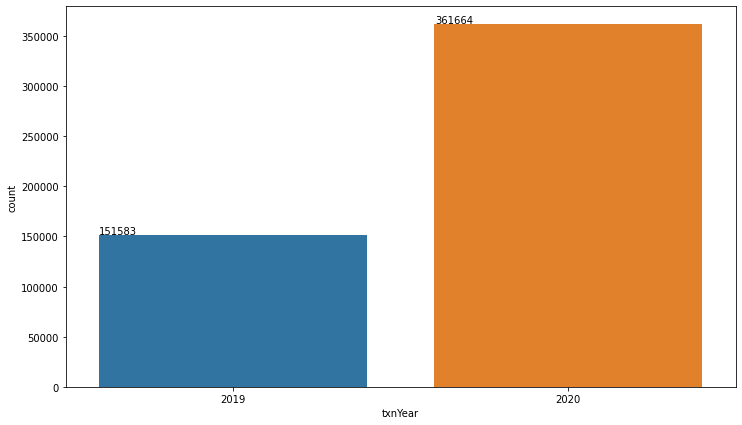

In [7]:
plt.figure(figsize=(12,7))
ax = sns.countplot(x=data['txnYear']) #comparing the number of trasanctions that happened in both years
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

The count plot above shows the frequency at which each year appears, in this case there were more instances of transactions in 2020 than there was in 2019

In [8]:
data['status'].value_counts(normalize=True) * 100 #percentage of each status

successful     92.168293
failed          5.579380
declined        1.995725
initialized     0.236923
pending         0.012470
debited         0.007209
Name: status, dtype: float64

Checking for the frequency of each status when a transaction was initiated.
1. 92% of the transactions were successful in the entire dataset
2. 5.6% of the transactions failed in the entire dataset

In [9]:
yr_2019 = data[data['txnYear'] == 2019]
yr_2020 = data[data['txnYear'] == 2020]

In [10]:
yr_2019['status'].value_counts(normalize=True) * 100

successful     87.063853
failed         10.305245
declined        2.276641
initialized     0.306763
pending         0.027708
debited         0.019791
Name: status, dtype: float64

Here we check the frequency for each status for 2019
1. There were 87% successful transactions carried out 
2. and 10.3% failed ones

In [11]:
yr_2020['status'].value_counts(normalize=True) * 100

successful     94.307700
failed          3.598644
declined        1.877986
initialized     0.207651
pending         0.006083
debited         0.001935
Name: status, dtype: float64

Alternatively we check the frequency for each status for 2020
1. There were 94.3% successful transactions carried out 
2. and 3.6% failed ones

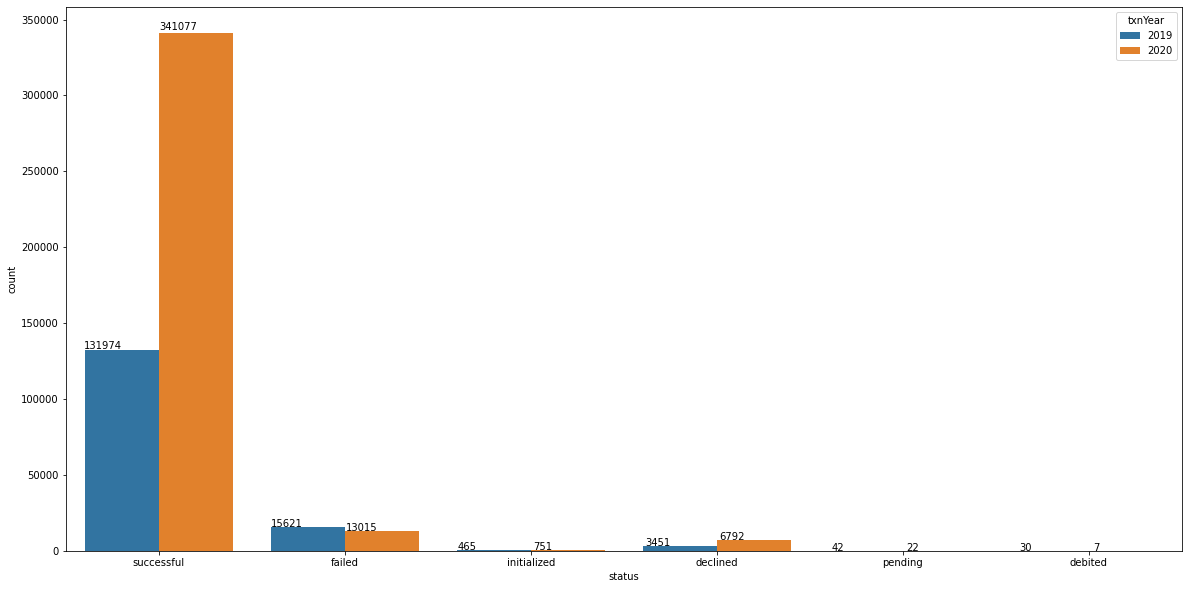

In [12]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x = 'status', hue='txnYear', data = data)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

The year 2020 saw more successful transactions relative to 2019, whereas 2019 saw more failed transactions

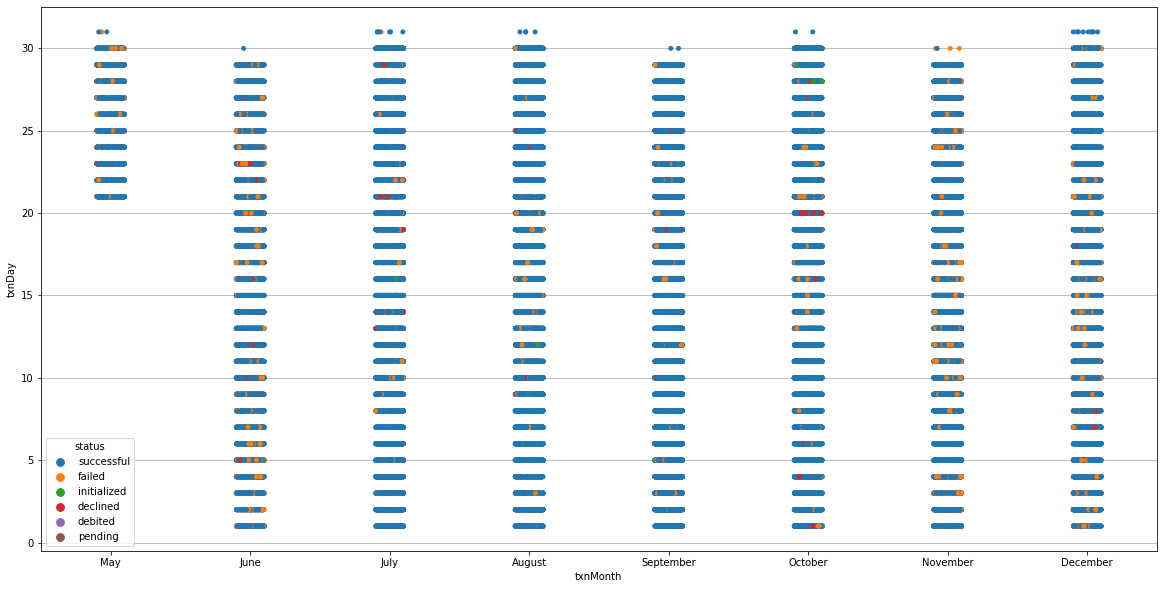

In [13]:
plt.figure(figsize=(20,10))
g = sns.stripplot(x='txnMonth', y='txnDay', hue='status', data=yr_2019)
g.set_xticklabels(['May', 'June', 'July','August','September','October', 'November','December'])
plt.grid(axis='y');

### From the plot above is for the year 2019 and we can infer a couple of points which shall be listed below:
1. As seen in previous plots successful transactions make up a bigger percentage.
2. The data starts from only the month of May and from day 21.
3. At almost every month usually on the 30th and 31th the number of transactions reduce.
4. October the 20th had a high number of declined transactions.

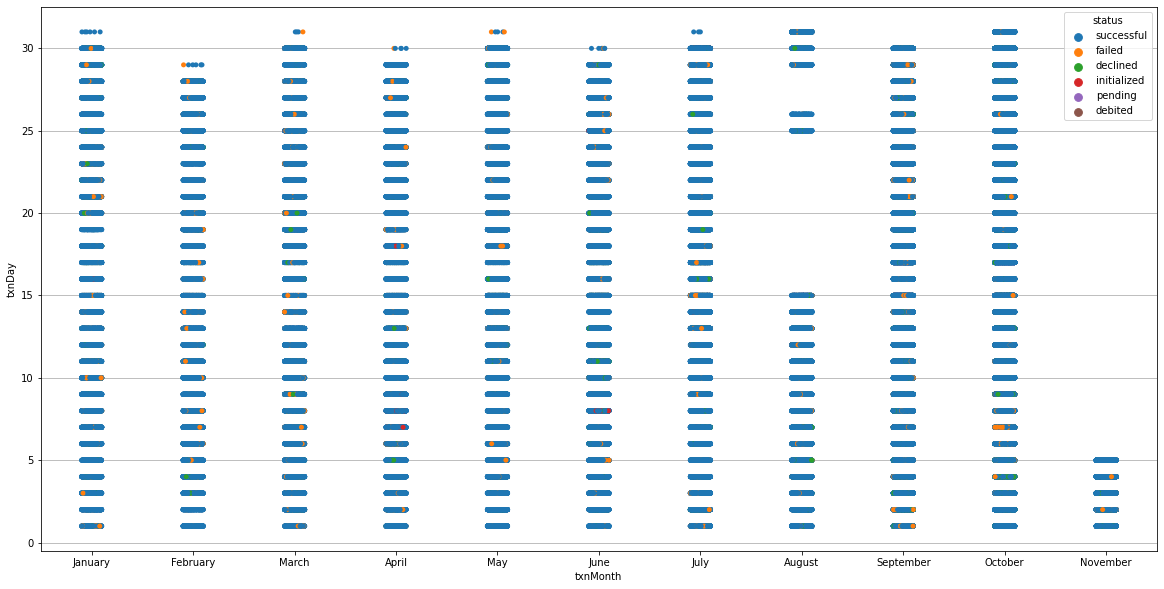

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(20,10))
g = sns.stripplot(x='txnMonth', y='txnDay', hue='status', data=yr_2020)
g.set_xticklabels(['January', 'February','March','April','May', 'June', 'July','August','September','October', 'November'])
plt.grid(axis='y')
plt.figure();

### From the plot above is for the year 2020 and we can infer a couple of points which shall be listed below:
1. February has no transactions for 30th and 31th because 2020 was a leap year.
2. There were no transactions between the 15th and the 25th and also on the 27th and 28th of August.
3. The data starts from January but ends on the 5th of November.

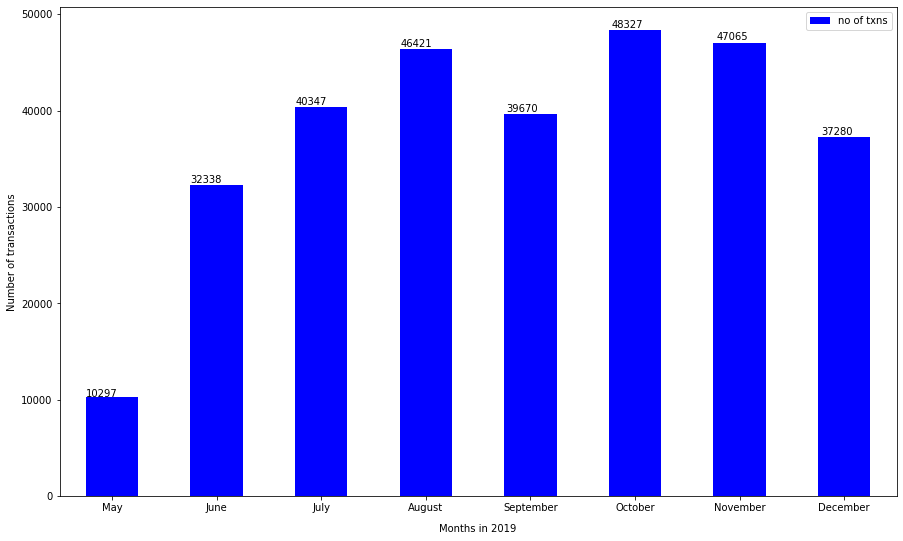

In [15]:
plt.figure(figsize=(15,9))
ax = yr_2019.groupby('txnMonth')['no of txns'].sum().plot(legend=True, kind='bar', color='blue')
ax.set_xlabel(xlabel='Months in 2019', labelpad=10.5)
ax.set_ylabel(ylabel='Number of transactions')
ax.set_xticklabels(['May', 'June', 'July','August','September','October', 'November','December'])
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### This plot show the number of transactiosns for each month in 2019:
1. We can see that August, October and November have the highest transactions for the year.
2. May has the lowest number of transactions but from above we could tell that the data only started from the 21st.
3. June has all its days but is the next lowest on the list followed by December and then July.

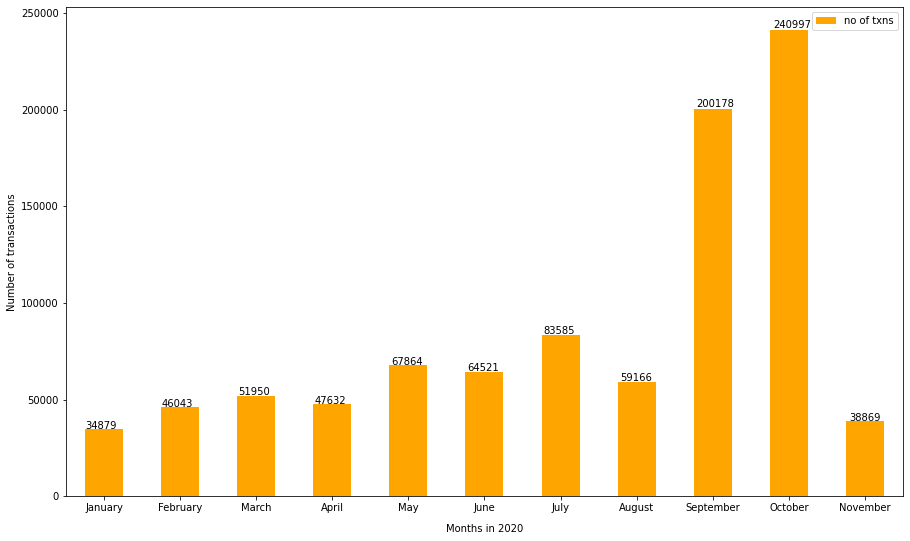

In [16]:
plt.figure(figsize=(15,9))
ax = yr_2020.groupby('txnMonth')['no of txns'].sum().plot(legend=True, kind='bar', color='orange')
ax.set_xlabel(xlabel='Months in 2020', labelpad=10.5)
ax.set_ylabel(ylabel='Number of transactions')
ax.set_xticklabels(['January', 'February','March','April','May', 'June', 'July','August','September','October', 'November'])
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### This plot show the number of transactiosns for each month in 2020:
1. October has the highest amount of Transactions followed by September.
2. All the other months seem to have relatively small numbers of transactions.
3. As seen before there's no data for December.
4. The month with the lowest amount of transactions is January Which has a significant drop from December 2019.

# Inference Summary
1. The data for each each is missing certain parts: 2019 only started from the last week of May and 2020 was missing December.
2. With the data provided 2020 had more transactions than 2019, both years had the highest record of transactions in Ocotber.
3. Both years had more successful transactions than any of the other statuses and both had the highest number of transactions in October.
4. There were no missing data. However further investigation is needed for August 2020.